1.Load the data from “glass.csv” and make a bar plot of different types of glasses.

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
glass=pd.read_csv('glass.csv')
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
glass.isna().any()

RI      False
Na      False
Mg      False
Al      False
Si      False
K       False
Ca      False
Ba      False
Fe      False
Type    False
dtype: bool

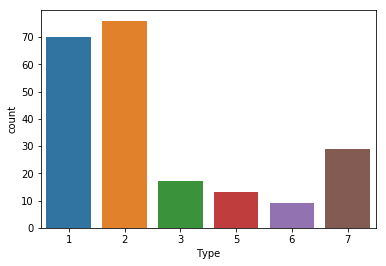

In [6]:
sns.countplot(glass.Type)

2.Make a train_test split and fit a single decision tree classifier

In [7]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics

In [9]:
train,test=train_test_split(glass,test_size=0.3,random_state=4)
print(train.shape)
print(test.shape)

(149, 10)
(65, 10)


In [10]:
train_x=train.iloc[:,:-1]
train_y=train.iloc[:,-1]
test_x=test.iloc[:,:-1]
test_y=test.iloc[:,-1]

In [13]:
model=tree.DecisionTreeClassifier()
model.fit(train_x,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

3.Make a k-fold split with 3 splits and measure the accuracy score with each split[Hint:Refer to KFold module under sklearn’s model selection.

In [20]:
from sklearn.model_selection import cross_validate
cross_validate(model,glass.iloc[:,:-1],glass.iloc[:,-1],cv=3)['test_score']

array([0.62162162, 0.63380282, 0.50724638])

In [16]:
y_pred=model.predict(test_x)
metrics.accuracy_score(y_pred,test_y)

0.7076923076923077

4.Use gridSearchCV from sklearn for finding out a suitable number of estimators for a RandomForestClassifer alongwith a 10-fold cross validation.[Hint:Define a range of estimators and feed in range as param_grid

In [23]:
from sklearn.model_selection import GridSearchCV
#parameters = {'kernel':('linear','rbf'),'C':[1, 10]}
parameters={'min_samples_split' : range(10,500,20),'max_depth': range(1,20,2)}
clf = GridSearchCV(model,parameters)
clf.fit(train_x, train_y)
sorted(clf.cv_results_.keys())

D:\softwares\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
D:\softwares\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'mean_train_score',
 'param_max_depth',
 'param_min_samples_split',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split0_train_score',
 'split1_test_score',
 'split1_train_score',
 'split2_test_score',
 'split2_train_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score',
 'std_train_score']

In [24]:
clf.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=13,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [26]:
cross_validate(clf,train_x,train_y,cv=3)['test_score']

D:\softwares\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
D:\softwares\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
D:\softwares\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
D:\softwares\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from T

array([0.52941176, 0.66      , 0.47916667])